<a href="https://colab.research.google.com/github/RanxduG/Machine-Learning-Coursework/blob/main/ML_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Preprocessing

In [ ]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                'hours-per-week', 'native-country', 'income']

df = pd.read_csv(url, names=column_names)
# Replace "?" values with the mode of each column
for column in df.columns:
    mode_value = df[column].mode()[0]  # Get the mode value of the column
    df[column].replace(" ?", mode_value, inplace=True)

# Now "?" values in all columns should be replaced with their respective modes
# Display brief description of the dataset
print("Dataset Description:")
print(df.info())
print("\nSample records:")
print(df.head())

Dataset Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Sample records:
   age          workclass  fnlwgt   education  edu

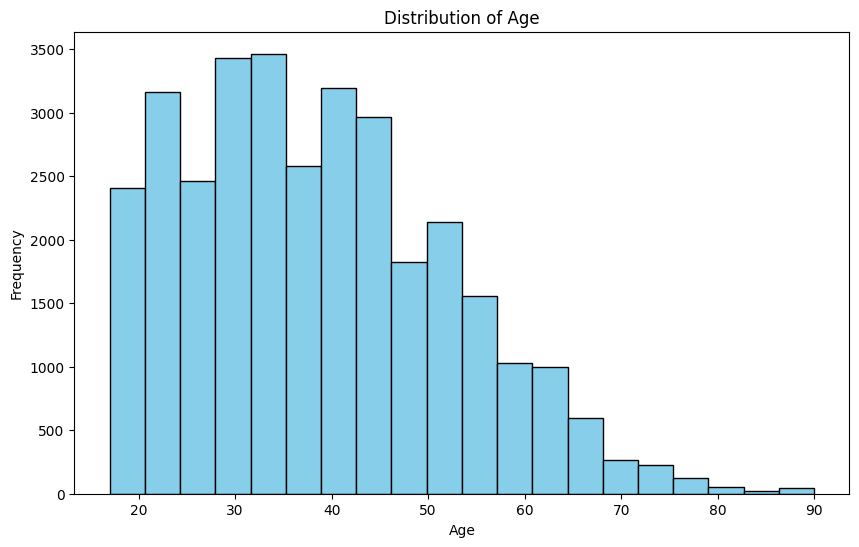

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<ipython-input-3-74065cfd2e90>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='education', data=df, orient='h', palette='viridis')


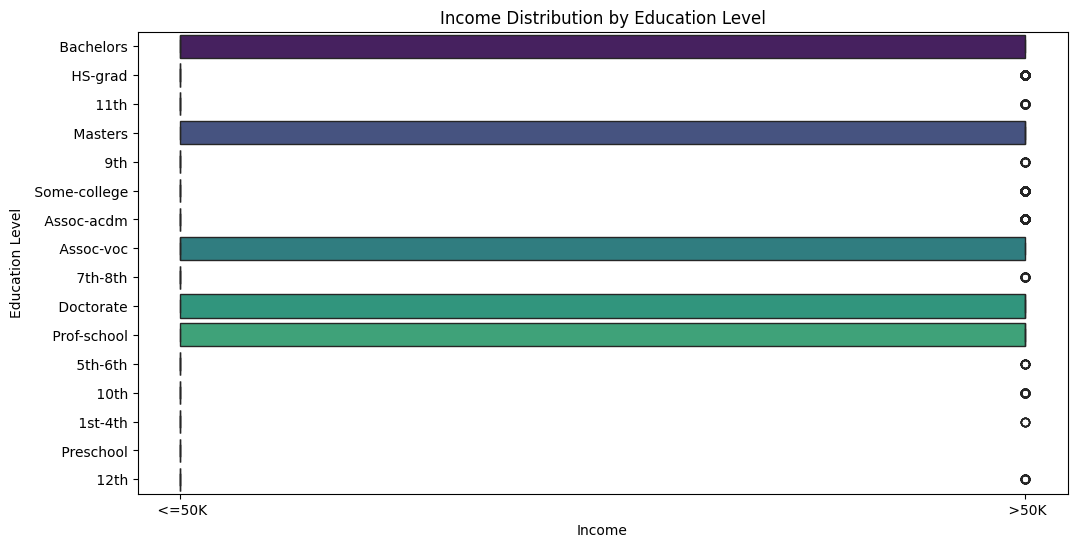

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='education', data=df, orient='h', palette='viridis')
plt.title('Income Distribution by Education Level')
plt.xlabel('Income')
plt.ylabel('Education Level')
plt.show()


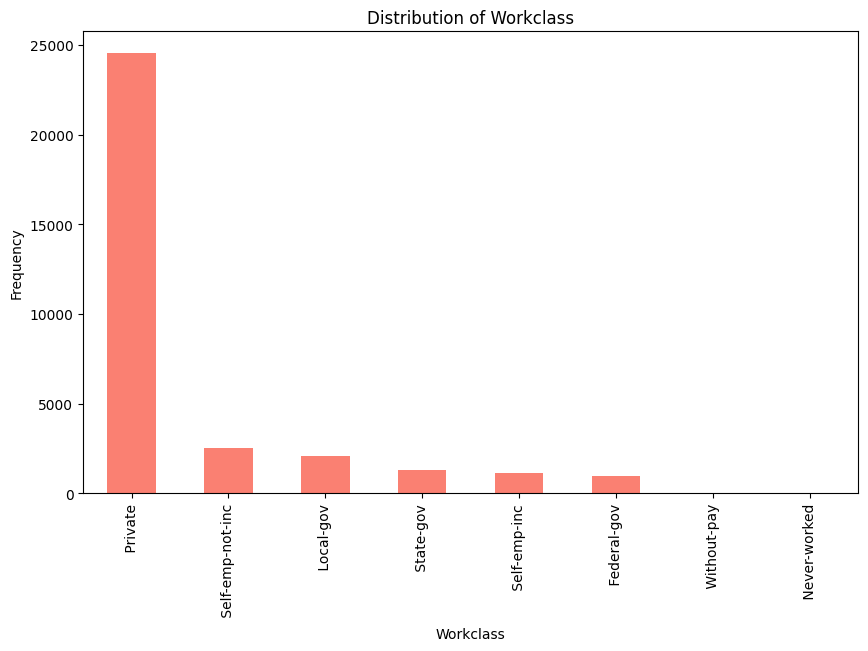

In [ ]:
plt.figure(figsize=(10, 6))
df['workclass'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Workclass')
plt.xlabel('Workclass')
plt.ylabel('Frequency')
plt.show()


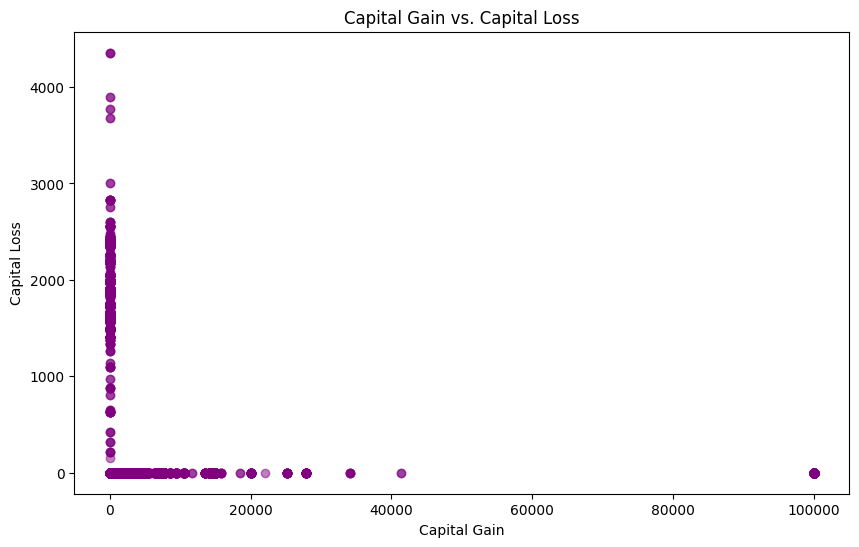

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['capital-gain'], df['capital-loss'], alpha=0.5, color='purple')
plt.title('Capital Gain vs. Capital Loss')
plt.xlabel('Capital Gain')
plt.ylabel('Capital Loss')
plt.show()

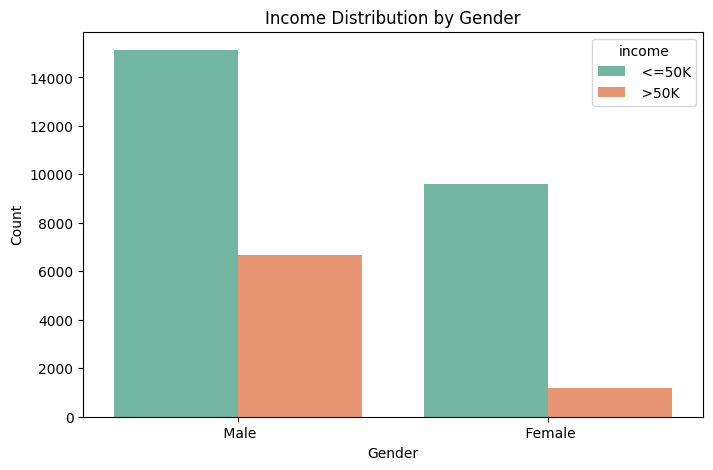

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='income', data=df, palette='Set2')
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


##Data Preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
# Initialize LabelEncoder
label_encoder = LabelEncoder()

preprocessed_df = df.copy()


workclass_column = preprocessed_df['workclass']
label_encoder.fit(workclass_column)
preprocessed_df['workclass'] = label_encoder.transform(workclass_column)

marital_status_column = preprocessed_df['marital-status']
label_encoder.fit(marital_status_column)
preprocessed_df['marital-status'] = label_encoder.transform(marital_status_column)

occupation_column = preprocessed_df['occupation']
label_encoder.fit(occupation_column)
preprocessed_df['occupation'] = label_encoder.transform(occupation_column)

relationship_column = preprocessed_df['relationship']
label_encoder.fit(relationship_column)
preprocessed_df['relationship'] = label_encoder.transform(relationship_column)

race_column = preprocessed_df['race']
label_encoder.fit(race_column)
preprocessed_df['race'] = label_encoder.transform(race_column)

sex_column = preprocessed_df['sex']
label_encoder.fit(sex_column)
preprocessed_df['sex'] = label_encoder.transform(sex_column)

native_country_column = preprocessed_df['native-country']
label_encoder.fit(native_country_column)
preprocessed_df['native-country'] = label_encoder.transform(native_country_column)

income_column = preprocessed_df['income']
label_encoder.fit(income_column)
preprocessed_df['income'] = label_encoder.transform(income_column)

preprocessed_df.drop('education', axis=1, inplace=True)
preprocessed_df.dropna(inplace = True)
print(preprocessed_df.tail())

# Separate features and target variable
x = preprocessed_df.drop('income', axis=1)
y = preprocessed_df['income'].copy()
print(x.shape)
print(y.shape)


       age  workclass  fnlwgt  education-num  marital-status  occupation  \
32556   27          3  257302             12               2          12   
32557   40          3  154374              9               2           6   
32558   58          3  151910              9               6           0   
32559   22          3  201490              9               4           0   
32560   52          4  287927              9               2           3   

       relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
32556             5     4    0             0             0              38   
32557             0     4    1             0             0              40   
32558             4     4    0             0             0              40   
32559             3     4    1             0             0              20   
32560             5     4    0         15024             0              40   

       native-country  income  
32556              38       0  
32557     

In [ ]:
print(preprocessed_df.columns)
# Calculate Pearson correlation coefficients
correlation_matrix = preprocessed_df.corr()

# Select correlation with the income_num variable
income_correlation = correlation_matrix['income'].drop('income')

print("Pearson Correlation with income_num:")
print(income_correlation)


Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')
Pearson Correlation with income_num:
age               0.234037
workclass         0.002693
fnlwgt           -0.009463
education-num     0.335154
marital-status   -0.199307
occupation        0.034625
relationship     -0.250918
race              0.071846
sex               0.215980
capital-gain      0.223329
capital-loss      0.150526
hours-per-week    0.229689
native-country    0.023058
Name: income, dtype: float64


In [ ]:
print("Unique values in income_num:", preprocessed_df['income'].unique())

Unique values in income_num: [0 1]


In [ ]:
# Identify columns with string values
string_columns = preprocessed_df.select_dtypes(include=['object']).columns

print("Columns with string values:")
print(string_columns)

Columns with string values:
Index([], dtype='object')


##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)
print(x_train.head)
print(y_train.shape)

<bound method NDFrame.head of        age  workclass  fnlwgt  education-num  marital-status  occupation  \
17064   19          3  219300             10               4          11   
18434   58          3  116901              9               0           7   
3294    43          3  220589              9               0           3   
31317   23          3   50953             10               4          12   
4770    18          3  130849              7               4           7   
...    ...        ...     ...            ...             ...         ...   
28636   55          0  176904              9               2           3   
17730   33          6  108116              9               2          12   
28030   19          5   36012              9               4           2   
15725   23          3   51985              9               4          13   
19966   19          3  174478              9               4           7   

       relationship  race  sex  capital-gain  capital-los

In [ ]:
class_counts = y_train.value_counts()

print("Class counts in y_train:")
print(class_counts)

Class counts in y_train:
0    19793
1     6255
Name: income, dtype: int64


##Imbalanced Learning

In [ ]:
from imblearn.over_sampling import SMOTE

# Define the SMOTE oversampling strategy
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


In [ ]:
class_counts = y_train_resampled.value_counts()

print("Class counts in y_train:")
print(class_counts)

Class counts in y_train:
0    19793
1    19793
Name: income, dtype: int64


##Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Use accuracy as the metric
                           n_jobs=-1)  # Use all available CPU cores

# Perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_random_forest = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_rf = best_random_forest.predict(x_test)
print("\nBest Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4927
           1       0.78      0.62      0.69      1586

    accuracy                           0.87      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.87      0.86      6513



##Feature selection

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(max_depth= None , min_samples_leaf= 2, min_samples_split= 4, n_estimators= 100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(x_train_resampled, y_train_resampled)

# Select features based on feature importance
feature_selector = SelectFromModel(rf_classifier, threshold='median')
feature_selector.fit(x_train_resampled, y_train_resampled)

# Transform the training and test data to include only selected features
x_train_selected = feature_selector.transform(x_train_resampled)
x_test_selected = feature_selector.transform(x_test)

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support(indices=True)
# Get the column names of the selected features
selected_feature_columns = df.columns[selected_feature_indices]

# Print the selected feature columns
print("Selected Feature Columns:", selected_feature_columns)



Selected Feature Columns: Index(['age', 'fnlwgt', 'education', 'education-num', 'occupation', 'sex',
       'capital-loss'],
      dtype='object')


##Model Training

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Train Naïve Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(x_train_resampled, y_train_resampled)

# Train Random Forest Classification model
random_forest = RandomForestClassifier(max_depth= None , min_samples_leaf= 2, min_samples_split= 4, n_estimators= 100, random_state=42)
random_forest.fit(x_train_resampled, y_train_resampled)


RandomForestClassifier(min_samples_leaf=2, min_samples_split=4, random_state=42)

##Model Testing

In [ ]:


# Predict on the test set for Naïve Bayes
y_pred_nb = naive_bayes.predict(x_test)
print("\nNaïve Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Predict on the test set for Random Forest
y_pred_rf = random_forest.predict(x_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4927
           1       0.66      0.33      0.44      1586

    accuracy                           0.79      6513
   macro avg       0.74      0.64      0.66      6513
weighted avg       0.78      0.79      0.77      6513


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      4927
           1       0.67      0.73      0.70      1586

    accuracy                           0.85      6513
   macro avg       0.79      0.81      0.80      6513
weighted avg       0.85      0.85      0.85      6513



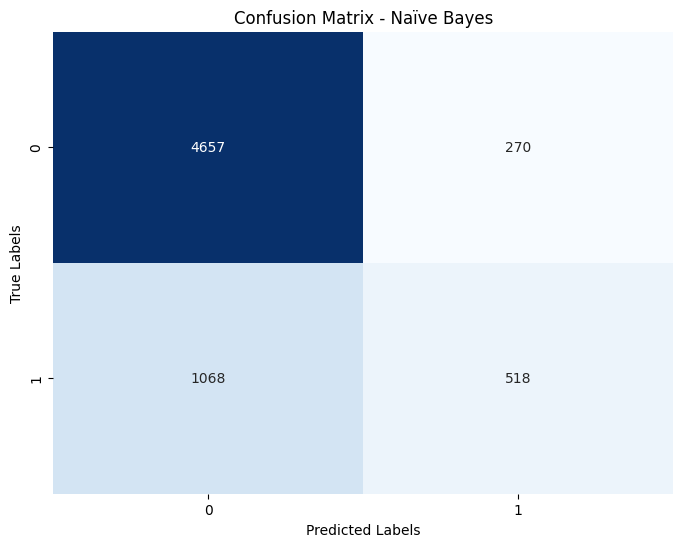

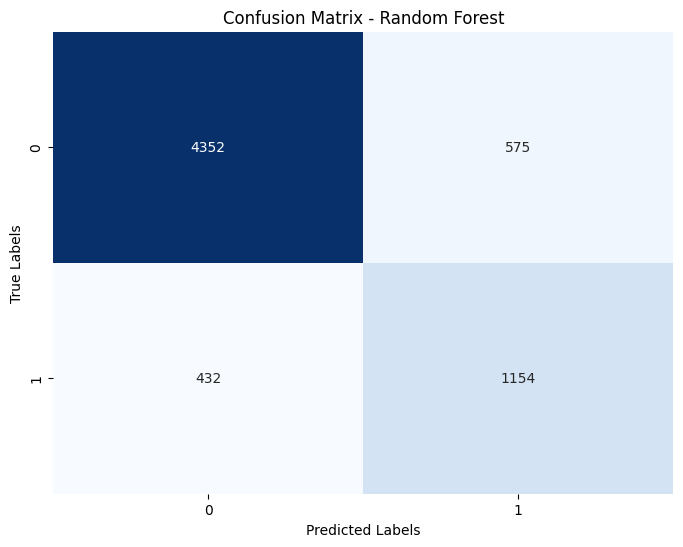

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for Naïve Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix for Naïve Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Naïve Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
